<a href="https://colab.research.google.com/github/leinaxd/NOTES/blob/main/digital_image_processing/notebooks/11a_boundary_following.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Boundary following

In [ ]:
shape_1 = np.array(
    [[0,0,0,0,0,0,0,0],
     [0,0,1,1,1,1,0,0],
     [0,1,0,0,1,0,0,0],
     [0,0,1,0,1,0,0,0],
     [0,1,0,0,1,0,0,0],
     [0,1,1,1,1,0,0,0],
     [0,0,0,0,0,0,0,0]])

abs_coding_1 = np.array([0,0,0,5,6,6,6,4,4,4,2,1,3,1])
rel_coding_1 = np.array([0,0,5,1,0,0,6,0,0,6,7,2,6,7])

shape_2 = np.array(
    [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0],
     [0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
     [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
     [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
     [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
     [0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0],
     [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0],
     [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0],
     [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
     [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
     [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
     [0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
     [0,1,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
     [0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

abs_coding_2 = np.array([0,0,0,0, 0,0,0,0, 0,0,0,7, 7,7,6,5, 4,5,4,4, 5,4,4,4, 5,5,5,7, 7,0,0,0, 7,0,7,7, 6,5,5,4, 4,4,4,4, 4,4,4,3, 5,5,5,5, 5,4,5,3, 2,3,2,2, 2,1,2,2, 1,1,1,1, 1,0,1,1, 3,3,4,4, 3,1,1,1, 0])
rel_coding_2 = np.mod(abs_coding_2[1:]-abs_coding_2[:-1], 8)
start = (1,10) #calculated automatically (first non 0)

# Example usage
shape_3 = np.array(
    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
     [0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
     [0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
     [0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 1, 1, 1, 0]])

shape_4 = np.array([ [0,0,0,0,0,0,0,0],
                [0,0,1,0,1,0,0,0],
                [0,1,0,1,0,1,0,0],
                [0,0,1,0,1,0,0,0],
                [0,0,0,0,0,0,0,0]])
shape_5 = np.array([[0,0,0,0,0],
                    [0,0,1,1,0],
                    [0,1,0,1,0],
                    [0,0,0,0,0]])

plt.imshow(shape_2, cmap='gray')
plt.axis('off');

Moore's boundary following algorithm

(used in cellular automata)

abs encoding
 [0 0 0 0 0 0 0 0 0 0 0 7 7 7 6 5 4 5 4 4 5 4 4 4 5 5 5 7 7 0 0 0 7 0 7 7 6
 5 5 4 4 4 4 4 4 4 4 3 5 5 5 5 5 4 5 3 2 3 2 2 2 1 2 2 1 1 1 1 1 0 1 1 3 3
 4 4 3 1 1 1 0 1]
expected abs
 [0 0 0 0 0 0 0 0 0 0 0 7 7 7 6 5 4 5 4 4 5 4 4 4 5 5 5 7 7 0 0 0 7 0 7 7 6
 5 5 4 4 4 4 4 4 4 4 3 5 5 5 5 5 4 5 3 2 3 2 2 2 1 2 2 1 1 1 1 1 0 1 1 3 3
 4 4 3 1 1 1 0]
rel encode
 [0 0 0 0 0 0 0 0 0 0 7 0 0 7 7 7 1 7 0 1 7 0 0 1 0 0 2 0 1 0 0 7 1 7 0 7 7
 0 7 0 0 0 0 0 0 0 7 2 0 0 0 0 7 1 6 7 1 7 0 0 7 1 0 7 0 0 0 0 7 1 0 2 0 1
 0 7 6 0 0 7 1]


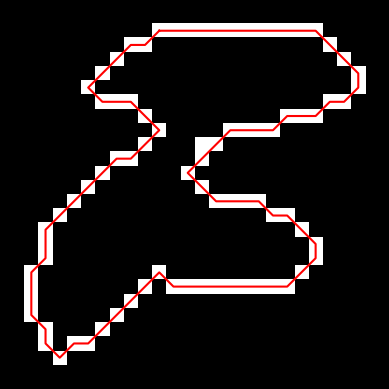

In [241]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
def trace_boundary(image):
    height, width = image.shape
    boundary = []
    
    # Define the clockwise Moore neighborhood relative to the center pixel
    neighbors = [(-1,-1),(-1, 0),(-1, 1),
                 ( 0, 1),        ( 1, 1),
                 ( 1, 0),( 1,-1),( 0,-1)]

    # scan the starting pixel
    start_pixel = None
    for i in range(height):
        for j in range(width):
            if image[i, j] == 1:
                start_pixel = (i, j)
                break
        if start_pixel is not None:
            break

    if start_pixel is None: raise ValueError("No boundary found in the image.")

    start_direction = 7  # Initial direction (top-left)
    current_pixel = start_pixel
    direction = start_direction
    before_start_pixel = (start_pixel[0]+neighbors[start_direction][0] , start_pixel[1]+neighbors[start_direction][1])

    while True:
        boundary.append(current_pixel)
        
        # Search for the next boundary pixel in clockwise order
        found_next = False
        for i in range(8):
            neighbor_x, neighbor_y = neighbors[(direction + i) % 8]
            current_pixel = (boundary[-1][0]+neighbor_x, boundary[-1][1]+neighbor_y)

            # Handle boundary conditions
            if current_pixel[0] < 0 or current_pixel[0] >= height or current_pixel[1] < 0 or current_pixel[1] >= width:
                continue

            if image[current_pixel] == 1:
                #Note that i don't traverse the same point twice. 
                # i start at i+6 instead of i+5 (mirrored direction)
                direction = (direction + i + 6) % 8
                found_next = True
                break

        if not found_next: break
        if current_pixel == start_pixel:
            #i have to do one more step to check if i'm repeating the sequence
            if (direction -1)%8 == start_direction:
                boundary.append(current_pixel)
                break

    return boundary

def abs_encode(boundary):
    b=boundary
    encoding = {(0,1):0, (-1,1):1, (-1,0):2, (-1,-1):3, (0,-1):4, (1,-1):5, (1,0):6, (1,1):7}
    direction = encoding[(b[1][0]-b[0][0], b[1][1]-b[0][1])]
    return [encoding[(b[i+1][0]-b[i][0], b[i+1][1]-b[i][1])]  for i in range(len(b)-1)]
def rel_encode(boundary):
    e = np.array(abs_encode(boundary))
    return np.mod(e[1:]-e[:-1], 8)

im = shape_2
boundary = trace_boundary(im)
print('abs encoding\n', np.array(abs_encode(boundary)))
print('expected abs\n', abs_coding_2)
print('rel encode\n', rel_encode(boundary))

# Plotting the result
plt.imshow(im, 'gray')
plt.plot([p[1] for p in boundary], [p[0] for p in boundary], 'r-')
plt.axis('off');